# Project 2: Wrangling and Analyze Data
### By Khalil MISBAH 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Importing required libraries.

import os
import requests
import tweepy
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time
import re

In [8]:
url_csv = 'https://video.udacity-data.com/topher/2018/November/5bf60fbf_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response_csv = requests.get(url_csv)
with open(url_csv.split('/')[-1].replace('-','_'), mode = 'wb') as file:
    file.write(response_csv.content)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [10]:
url_tsv = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response_tsv = requests.get(url_tsv)
with open(url_tsv.split('/')[-1].replace('-','_'), mode = 'wb') as file:
    file.write(response_tsv.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
url_json = 'https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json'
response_json = requests.get(url_json)
with open(url_json.split('/')[-1].replace('-','_')+'.txt', mode = 'wb') as file:
    file.write(response_json.content)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing `twitter_archive_enhanced.csv`

In [31]:
# Loading the twitter_archive_enhanced.csv as a panda DataFrame.
df_twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

# Printing the first 5 rows.
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Tidiness visual remark**:
- source link is nested within the raw HTML tags.
- `doggo`, `floofer`, `pupper`, and `puppo` are categorical variable of dogs growth stages. It is usually recommended in such situation to merge these columns into one column.

In [20]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [41]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


**Quality programmatic remark**:
- `retweeted_status_id` refers to dogs that are existing in original tweets. Thus retweets records are not necessary for our analysis.

In [23]:
df_twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

**Tidiness visual remark**:
- If we remove retweets records from this dataset, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`  have few non-null and unique records, which won't serve much for our analysis. Therefore, it's good to remove them and keep only on `tweet_id`.

In [34]:
df_twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [59]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced.name.str.istitle()==True].name.value_counts()

None          745
Charlie        12
Oliver         11
Cooper         11
Lucy           11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 927, dtype: int64

In [57]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced.name.str.islower()==True].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

**Quality programmatic remark**:
- `name` column holds some words that are inconsistent with usual dog names, and seem rather like a spelling mistakes for instance the occurrence of _a_ and _the_ among the names.

In [24]:
df_twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [25]:
df_twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

**Quality programmatic remark**:
- `rating_denominator` holds invalid values. The convention is that Dogs are rated on a scale of one to ten.

### Assessing `image_predictions.tsv`

In [15]:
# Loading the twitter_archive_enhanced.csv as a panda DataFrame.
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

# Printing the first 5 rows.
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Quality visual remark**:
- `p1`, `p2`, and `p3` 	Dog's breed names are innconsistent with formatting issues, some has the first letter capitalized while other are entirely in lowercase.

In [42]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [45]:
df_image_predictions[df_image_predictions.jpg_url.duplicated()].sort_values(by = 'jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1727,820446719150292993,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


**Quality programmatic remark**:
- `jpg_url` It has duplicated images, which raises the hypothesis of duplicated records.

### Assessing `tweet_json.txt`

In [47]:
# Loading the twitter_archive_enhanced.csv as a panda DataFrame.
df_tweet_api = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

# Printing the first 5 rows.
df_tweet_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [48]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality issues
* In `twitter_archive_enhanced`:
1. `retweeted_status_id` has references to dogs mentionned in previous original tweets. Thus retweets records are not necessary for our analysis.

2. `name` column holds some words that are inconsistent with usual dog names, and seem rather like a spelling mistakes for instance the occurrence of _a_ and _the_ among the names.

3. `timestamp` has to be converted into datetime format to be useful.

4. `rating_denominator` holds invalid values. The convention is that Dogs are rated on a scale of one to ten.

5. `rating_numerator` holds invalid values. The convention is that Dogs are rated on a scale of one to ten.

6. If we remove retweets records from this dataset, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`  have few non-null and unique records, which won't serve much for our analysis. Therefore, it's good to remove them and keep only on `tweet_id`.

* In `image_predictions.tsv`:
7. `p1`, `p2`, and `p3` 	Dog's breed names are innconsistent with formatting issues, some has the first letter capitalized while other are entirely in lowercase.

8. `jpg_url` It has duplicated images, which raises the hypothesis of duplicated records.

### Tidiness issues

* In `twitter_archive_enhanced`:
1. Source link is nested within the raw HTML tags.
2. `doggo`, `floofer`, `pupper`, and `puppo` are categorical variable of dogs growth stages. It is usually recommended in such situation to merge these columns into one column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [216]:
# Make copies of original pieces of data

df_twitter_archive_clean = df_twitter_archive_enhanced.copy()

df_image_predictions_clean = df_image_predictions.copy()
 
df_tweet_api_clean = df_tweet_api.copy()


### Issue #1:
`retweeted_status_id` has references to dogs mentionned in previous original tweets. Thus retweets records are not necessary for our analysis.

#### Define: 
Keep just on `retweeted_status_id` values that are NULL.

#### Code

In [217]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [218]:
df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [219]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2:
`name` column holds some words that are inconsistent with usual dog names, and seem rather like a spelling mistakes for instance the occurrence of _a_ and _the_ among the names.

#### Define:
Delete name that are in lowercase

#### Code

In [220]:
lc_names = []

for name in df_twitter_archive_clean.name:
    if name.islower():
        lc_names.append(name)

lc_names = list(set(lc_names))

# Loop to replace each non standard name (non_name).
for name in lc_names:
    df_twitter_archive_clean.name.replace(name, "None", inplace = True)

#### Test

In [221]:
sum(df_twitter_archive_clean.name.isin(lc_names))

0

### Issue #3:
`timestamp` has to be converted into datetime format to be useful.

#### Define:
Convert `timestamp` using time module

#### Code

In [222]:
timestamp = df_twitter_archive_clean.timestamp.tolist()

# removing the ' +0000'.
timestamp_str = list(map( lambda x : str(x).split(' +0000')[0], timestamp))

timestamp_str = pd.DataFrame(timestamp_str, columns = ['timestamp'])

df_twitter_archive_clean.timestamp = timestamp_str.timestamp.apply(np.datetime64)

#### Test

In [223]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   1996 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

### Issue #4:
4. `rating_denominator` holds invalid values. The convention is that Dogs are rated on a scale of one to ten.

#### Define:
Delete tweets with denominators with values equal to 0 or more than 10

#### Code

In [224]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator==10]

#### Test

In [225]:
df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:
`rating_numerator` holds invalid values. The convention is that Dogs are rated on a scale of one to ten. Since it is known sometimes invariably ratings in excess of the 10 are given, we will tolerate numerator values up to 20.

#### Define:
Delete tweets with numerators with values superio to 20

#### Code

In [226]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_numerator<=20]

#### Test

In [227]:
df_twitter_archive_clean[df_twitter_archive_clean.rating_numerator>20].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

### Issue #6:
`p1`, `p2`, and `p3` Dog's breed names are innconsistent with formatting issues, some has the first letter capitalized while other are entirely in lowercase.

#### Define:
Set names to sentence case in `p1`, `p2`, and `p3`

#### Code

In [228]:
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.title()
df_image_predictions_clean.p2 = df_image_predictions_clean.p2.str.title()
df_image_predictions_clean.p3 = df_image_predictions_clean.p3.str.title()

#### Test

In [229]:
sum(df_image_predictions_clean.p1.str.istitle()==True)
sum(df_image_predictions_clean.p2.str.istitle()==True)
sum(df_image_predictions_clean.p3.str.istitle()==True)

2075

### Issue #7:
If we remove retweets records from this dataset, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`  have few non-null and unique records, which won't serve much for our analysis. Therefore, it's good to remove them and keep only on `tweet_id`.

#### Define:
Delete `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`

#### Code

In [230]:
undesirable = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
               'retweeted_status_user_id','retweeted_status_timestamp']
df_twitter_archive_clean.drop(undesirable, axis = 1, inplace=True)

#### Test

In [231]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2145 non-null   int64         
 1   timestamp           1967 non-null   datetime64[ns]
 2   source              2145 non-null   object        
 3   text                2145 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2145 non-null   int64         
 6   rating_denominator  2145 non-null   int64         
 7   name                2145 non-null   object        
 8   doggo               2145 non-null   object        
 9   floofer             2145 non-null   object        
 10  pupper              2145 non-null   object        
 11  puppo               2145 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 217.9+ KB


### Issue #8:
`jpg_url` It has duplicated images, which raises the hypothesis of duplicated records.

#### Define:
Drop records with duplicated images

#### Code

In [232]:
df_image_predictions_clean = df_image_predictions_clean[df_image_predictions_clean.jpg_url.duplicated()==False]

#### Test

In [233]:
df_image_predictions_clean[df_image_predictions_clean.jpg_url.duplicated()==True].sort_values(by = 'jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Tidiness issues

* In `twitter_archive_enhanced`:
1. Source link is nested within the raw HTML tags.
2. `doggo`, `floofer`, `pupper`, and `puppo` are categorical variable of dogs growth stages. It is usually recommended in such situation to merge these columns into one column.

### Issue #9:
Source link is nested within the raw HTML tags.

#### Define:
- Remove HTML tags from source link

#### Code

In [234]:
src = []

for tag in df_twitter_archive_clean.source:
    src.append(tag.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )

df_twitter_archive_clean.source = src

#### Test

In [235]:
df_twitter_archive_clean.source

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 2145, dtype: object

### Issue #10:
`doggo`, `floofer`, `pupper`, and `puppo` are categorical variable of dogs growth stages. It is usually recommended in such situation to merge these columns into one column.

#### Define:
Merge these columns into one column

#### Code

In [236]:
dog_growth = df_twitter_archive_clean[['doggo','floofer','pupper','puppo']]

dog_growth = dog_growth.replace('None', '')

dog_class = np.array(dog_growth['doggo']) + np.array(dog_growth['floofer']) + np.array(dog_growth['pupper']) + np.array(dog_growth['puppo'])

pd.DataFrame(dog_class, columns = ['dog_class']).dog_class.value_counts()

                1802
pupper           223
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_class, dtype: int64

In [237]:
# Fixing the dogs with two classifications.
dog_class[dog_class == 'doggopupper'] = 'mixed'
dog_class[dog_class == 'doggofloofer'] = 'mixed'
dog_class[dog_class == 'doggopuppo'] = 'mixed'

df_twitter_archive_clean = pd.concat([df_twitter_archive_clean, pd.DataFrame(dog_class, columns = ['dog_class'])], axis = 1)

to_drop = ['doggo','floofer','pupper','puppo']
df_twitter_archive_clean.drop(to_drop, axis = 1, inplace=True)

#### Test

In [238]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2145 non-null   float64       
 1   timestamp           1967 non-null   datetime64[ns]
 2   source              2145 non-null   object        
 3   text                2145 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2145 non-null   float64       
 6   rating_denominator  2145 non-null   float64       
 7   name                2145 non-null   object        
 8   dog_class           2145 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 183.8+ KB


### Issue #11:
Merge `df_twitter_archive_clean` and `df_image_predictions_clean` into a principal dataset and append `favorite_count` and `retweet_count` from `df_tweet_api_clean`

#### Define:
Left join `df_twitter_archive_clean` and `df_image_predictions_clean` based on `tweet_id` column
Same for `favorite_count` and `retweet_count` after renaming id to `tweet_id` in `df_tweet_api_clean`

#### Code

In [239]:
api_target_columns = df_tweet_api_clean.loc[:,('id', 'retweet_count', 'favorite_count')]
api_target_columns.columns = ['tweet_id', 'retweet_count', 'favorite_count']

#Merging
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, api_target_columns, on = 'tweet_id', how = 'left')
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on = 'tweet_id', how = 'left')

#### Test

In [240]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2352
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2145 non-null   float64       
 1   timestamp           1967 non-null   datetime64[ns]
 2   source              2145 non-null   object        
 3   text                2145 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2145 non-null   float64       
 6   rating_denominator  2145 non-null   float64       
 7   name                2145 non-null   object        
 8   dog_class           2145 non-null   object        
 9   retweet_count       1400 non-null   float64       
 10  favorite_count      1400 non-null   float64       
 11  jpg_url             1285 non-null   object        
 12  img_num             1285 non-null   float64       
 13  p1                  1285 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [241]:
# Saving the `twt_ach_mstr` as twitter_archive_master.csv.
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [271]:
df = pd.read_csv('twitter_archive_master.csv')

In [270]:
df.dog_class = df.dog_class.fillna('None')
df_dog=df.groupby('dog_class')['favorite_count','retweet_count'].mean()
df_dog = df_dog.join(pd.DataFrame(df_dog.favorite_count/df_dog.retweet_count, columns = ['rate']))
df_dog

/var/folders/sn/9st0f2sx45v3qxbzgrntvpgr0000gn/T/ipykernel_27328/3423849324.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_dog=df.groupby('dog_class')['favorite_count','retweet_count'].mean()


,favorite_count,retweet_count,rate
dog_class,,,
None,8102.713580,2545.902881,3.182648
doggo,12017.514286,3284.485714,3.658872
floofer,6558.000000,2022.000000,3.243323
mixed,12207.125000,3529.000000,3.459089
pupper,8492.582677,2861.708661,2.967662
puppo,18022.416667,4946.250000,3.643653


### Insights:
1. There might be a possible correlation between retweet and favourites it will generate.

2. puppo tend to gather more favourites than the other growth stage for dogs

3. There is no clear correlation by dog growth stage of whom could get how many favourites based on retweet counts.

### Visualization

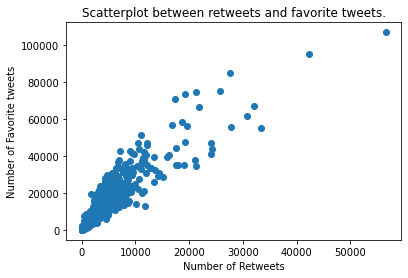

In [255]:
plt.figure()
plt.scatter(x = df['retweet_count'],
            y = df['favorite_count'])
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Favorite tweets')
plt.title('Scatterplot between retweets and favorite tweets.')
plt.show()                          